In [55]:
import numpy as np

import pandas as pd
import google.generativeai as genai
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

file_path = r"E:\ NLP Project\surveyproject\DataFile\research_Work_5\athlete_events.csv"

try:
    df = pd.read_csv(file_path)
    df.columns = [str(col).strip() for col in df.columns]

    print("\nDataFrame loaded successfully. Columns are:")
    print(df.columns.tolist())

except FileNotFoundError:
    print(f"Error: The file was not found at the specified path: {file_path}")
    
except Exception as e:
    print(f"An error occurred while reading the file: {e}")


DataFrame loaded successfully. Columns are:
['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [ ]:
# Loading Gemini Api:

try:
    genai.configure(api_key="XXXXXXXXX2rIslRwEz2oSRSsMoF-XXXXXXXXXX")
except Exception as e:
    print(f"Error configuring Gemini API: {e}")
    exit()

In [58]:
def generate_pandas_script(dataframe, question):
    """
    Asks Gemini to convert a question into a Python script for pandas.
    It provides the exact column names in the prompt to prevent errors.
    """
    model = genai.GenerativeModel('gemini-1.5-flash')

    # prompt for fine tuning
    prompt = f"""
    You are a pandas expert. Your task is to convert the user's question into a short Python script that operates on a DataFrame named 'df'.

    **DataFrame Schema:**
    The DataFrame `df` has the following columns: {dataframe.columns.tolist()} 

    **Instructions:**
    1.  Use the column names provided in the schema above.
    2.  Your output MUST be ONLY Python code.
    3.  Do not include any explanation or markdown like ```python.
    4.  The script can be multiple lines if needed.
    5.  The final answer **MUST** be stored in a variable named `result`.

    ---
    **Question:** "{question}"
    """

    # The list of column names is passed directly into the prompt so that the LLM remembers the exact names. 

    try:
        response = model.generate_content(prompt)
        generated_code = response.text.strip().replace("`", "")
        if generated_code.startswith("python"):
            generated_code = generated_code[6:].strip()
        return generated_code
    except Exception as e:
        return f"API Error: {e}"

In [59]:
if df is not None:
    print("\n" + "="*50)
    print("--- Running Full Set of Analysis Questions ---")
    print("="*50 + "\n")

    # Questions
    all_questions = [
        # Basic Questions
        "How many unique Olympic Games are recorded in the dataset?",
        "What was the age of the oldest athlete to participate?",
        "How many athletes represented the team 'Jamaica'?",
        "What was the average weight of all athletes?",
        "What are the three most common sports in the dataset?",
        "What is the name and age of the youngest athlete to win a Gold medal?",
        "How many medals in total were awarded in the 2016 Summer Olympics?",
        # Intermediate Questions
        "What are the top 5 teams with the most medals overall (Gold, Silver, or Bronze)?",
        "What is the average weight and height for female vs. male athletes?",
        "Which 5 events have had the most participants throughout history?",
        "List all the different cities that have hosted the Winter Olympics.",
        "What is the average age of athletes for each medal type (Gold, Silver, Bronze)?",
        "Which 5 countries have sent the most female athletes to the Olympics?",
        "For the 'Athletics' sport, which 5 specific events have the most participants?",
        # Advanced Questions
        "Create a new column 'Decade' from the 'Year'. Then, show the total number of medals awarded per decade.",
        "For countries that have won at least 500 total medals, which 5 have the highest percentage of Gold medals?",
        "Identify 10 athletes who have competed in both the Summer and Winter Olympics.",
        "How did the average height of the 'USA' men's basketball team change over time? Show the average height for each year they participated.",
        "Identify 5 athletes who have won medals in more than one distinct sport.",
        "For each team that has won over 1000 medals, find the sport that has brought them the most medals.",
        "Calculate the Body Mass Index (BMI) for all athletes. Then, for each sport with at least 500 medal events, find the average BMI of their gold medalists. List the top 3 sports with the highest BMI and the bottom 3 with the lowest.",
        "For the top 3 medal-winning countries (USA, Russia, Germany), find the decade in which each won the most Gold medals."
    ]

    for i, q in enumerate(all_questions):
        print(f" * Question {i+1} of {len(all_questions)}: {q}")

        # Generate the script from the LLM
        print("Generating script from Gemini...")
        script_to_execute = generate_pandas_script(df, q)
        print(f"Generated Script:\n{textwrap.indent(script_to_execute, '      ')}")

        try:
            local_scope = {}
            exec(script_to_execute, {'df': df, 'pd': pd, 'np': np}, local_scope)
            result = local_scope.get('result', 'No result variable found.')

            print(" ***** Result: ***** ")
            print(result)
        except Exception as e:
            print(f" XXXXX Error executing script: {e} XXXXX ")

        print("-" * 20 + "\n")


--- Running Full Set of Analysis Questions ---

 * Question 1 of 22: How many unique Olympic Games are recorded in the dataset?
Generating script from Gemini...
Generated Script:
      result = len(df['Games'].unique())
 ***** Result: ***** 
51
--------------------

 * Question 2 of 22: What was the age of the oldest athlete to participate?
Generating script from Gemini...
Generated Script:
      result = df['Age'].max()
 ***** Result: ***** 
97.0
--------------------

 * Question 3 of 22: How many athletes represented the team 'Jamaica'?
Generating script from Gemini...
Generated Script:
      result = len(df[df['Team'] == 'Jamaica'])
 ***** Result: ***** 
841
--------------------

 * Question 4 of 22: What was the average weight of all athletes?
Generating script from Gemini...
Generated Script:
      result = df['Weight'].mean()
 ***** Result: ***** 
70.70239290053351
--------------------

 * Question 5 of 22: What are the three most common sports in the dataset?
Generating script 

In [ ]:
def generate_visualization_script(dataframe, question, filename):
    """
    Asks Gemini to convert a question into a Python visualization script.
    The prompt is now more specific to prevent errors.
    """
    model = genai.GenerativeModel('gemini-1.5-flash')

    prompt = f"""
    You are an expert data visualization specialist using Python. Your task is to convert the user's request into a Python script that generates a plot using pandas (as pd), matplotlib (as plt), and seaborn (as sns).

    **CRITICAL Instructions:**
    1.  Assume a pandas DataFrame named `df` is already loaded and available. DO NOT create your own sample data or DataFrame.
    2.  The script MUST use the DataFrame `df` provided in the environment.
    3.  Your output MUST be ONLY Python code. No explanations or markdown.
    4.  The script MUST NOT use `plt.show()`.
    5.  The script MUST save the final plot to a file using `plt.savefig('{filename}')`.
    6.  Ensure the plot is complete with a title and clear axis labels.
    7.  Use `plt.tight_layout()` before saving.

    **DataFrame Schema:**
    The DataFrame `df` has the following columns: {dataframe.columns.tolist()}

    ---
    **Request:** "{question}"
    """

    try:
        response = model.generate_content(prompt)
        generated_code = response.text.strip().replace("`", "")
        if generated_code.startswith("python"):
            generated_code = generated_code[6:].strip()
        return generated_code
    except Exception as e:
        return f"API Error: {e}"


--- Generating Visualizations ---

* Visualization Request 1: Generate a bar chart showing the top 10 countries with the most total medals. Label the axes and give it a title.
Generating script from Gemini...
Generated Script:
      import pandas as pd
      import matplotlib.pyplot as plt
      import seaborn as sns

      # Assuming df is already loaded

      top_10_countries = df.groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)

      plt.figure(figsize=(12, 6))
      sns.barplot(x=top_10_countries.index, y=top_10_countries.values)
      plt.title('Top 10 Countries with the Most Medals')
      plt.xlabel('Country (NOC)')
      plt.ylabel('Total Medals')
      plt.xticks(rotation=45, ha='right')
      plt.tight_layout()
      plt.savefig('top_10_countries_by_medal.png')
 ***** Success! Visualization saved as 'top_10_countries_by_medal.png' ***** 
--------------------

* Visualization Request 2: Create a histogram of the ages of all gold medal winners to show th

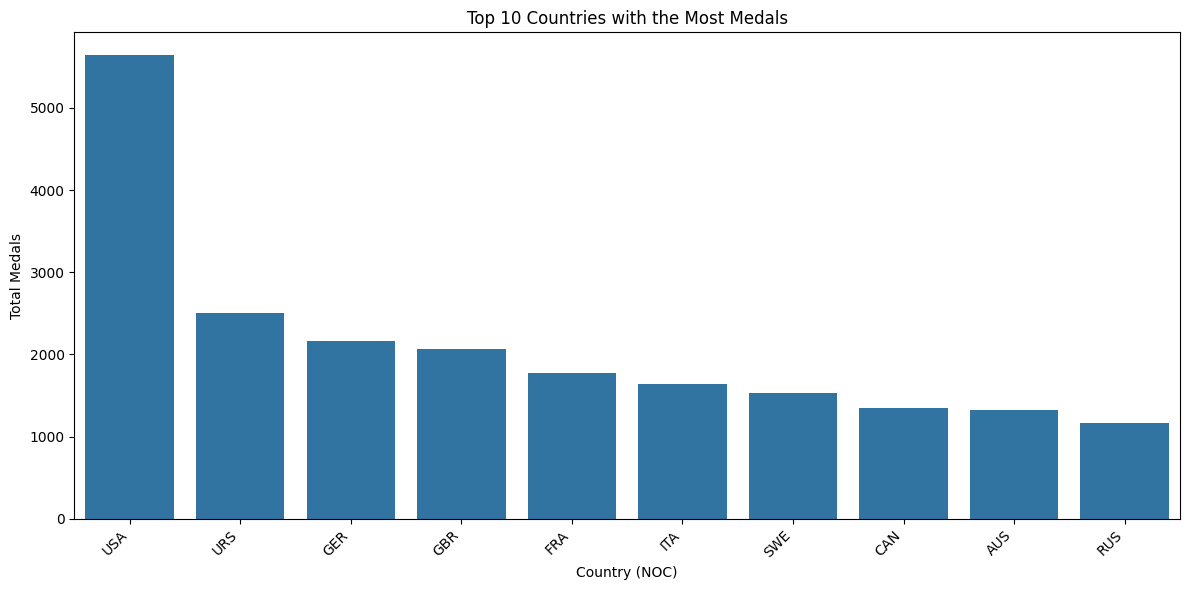

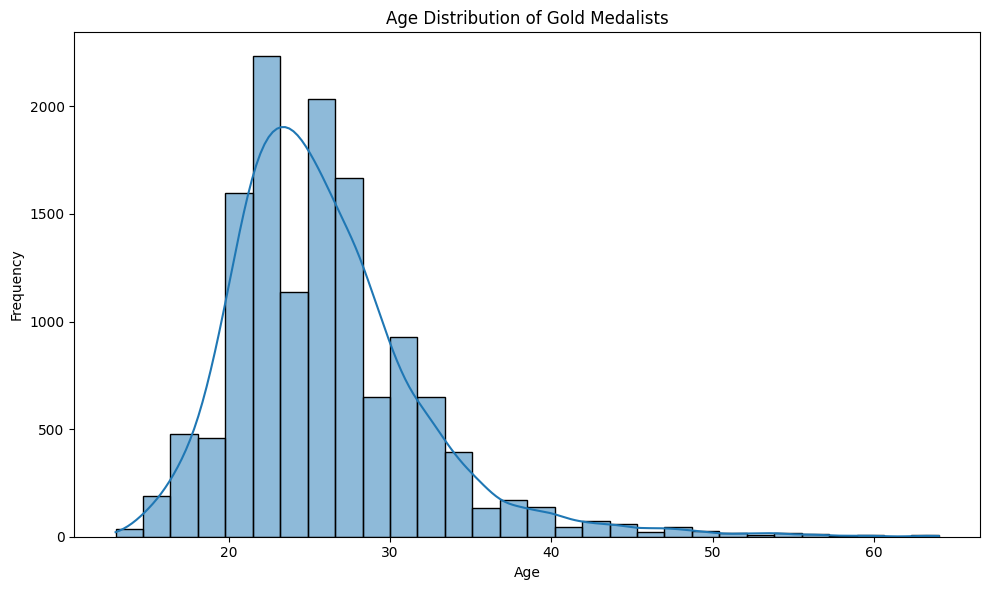

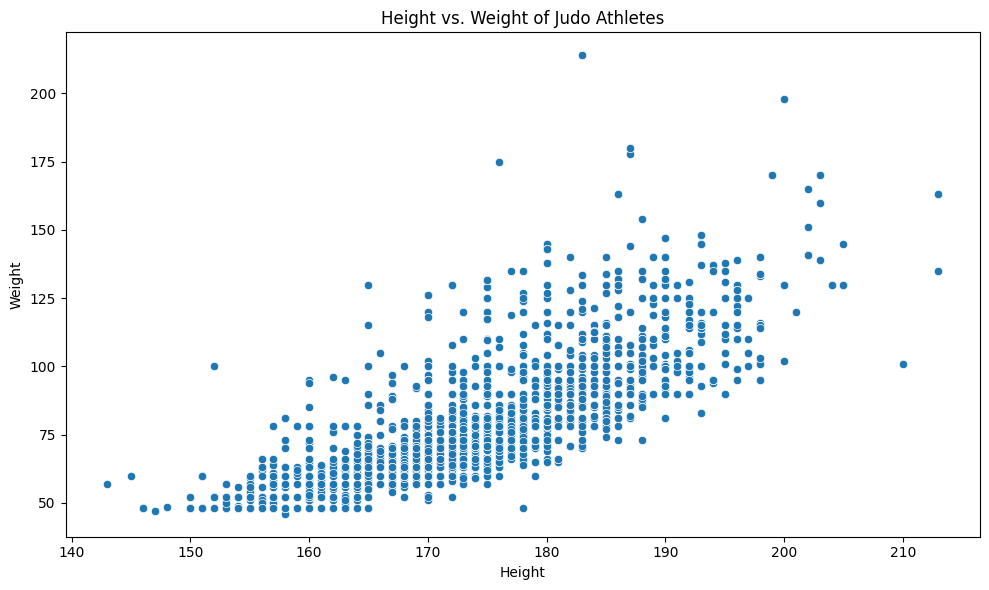

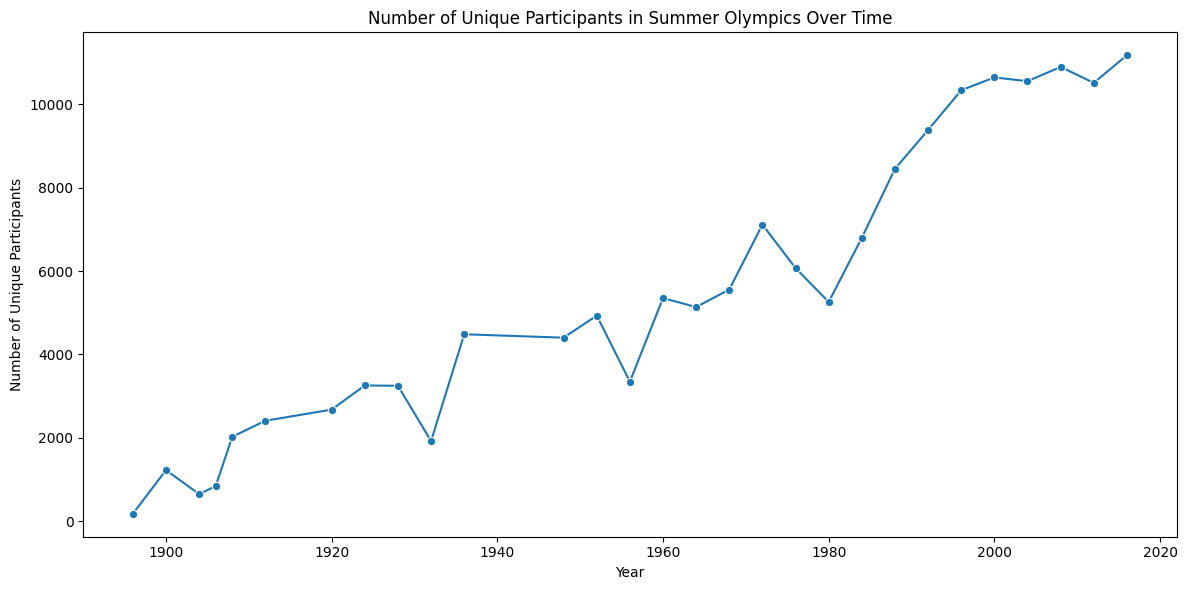

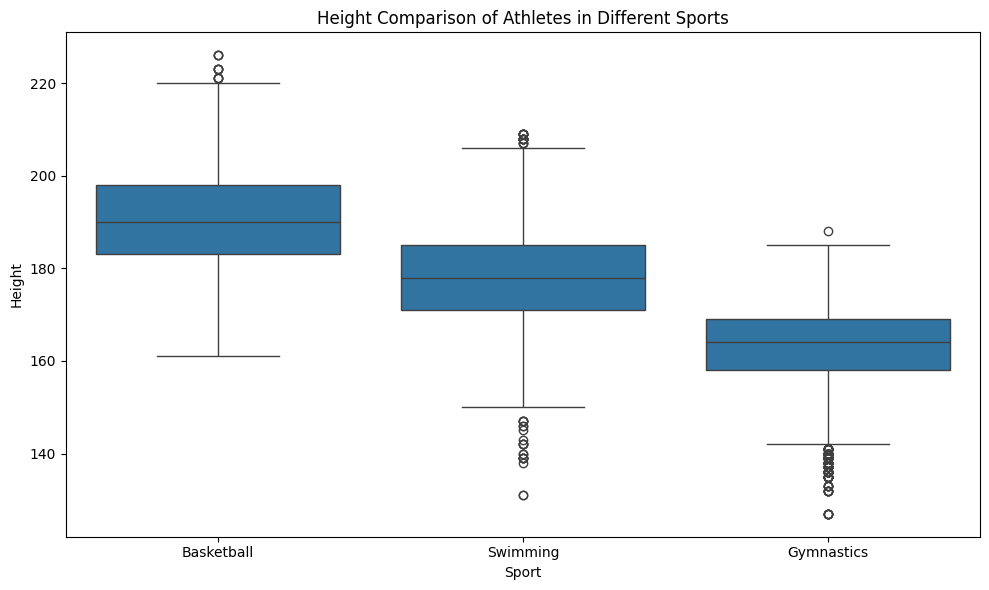

In [ ]:
if df is not None:
    print("\n" + "="*50)
    print("--- Generating Visualizations ---")
    print("="*50 + "\n")

    visualization_questions = [
        ("Generate a bar chart showing the top 10 countries with the most total medals. Label the axes and give it a title.", "top_10_countries_by_medal.png"),
        ("Create a histogram of the ages of all gold medal winners to show the distribution of peak performance age.", "age_distribution_gold_medalists.png"),
        ("Produce a scatter plot to visualize the relationship between the Height and Weight of athletes in the 'Judo' sport.", "judo_height_weight_scatter.png"),
        ("Generate a line chart showing the number of unique participants in the Summer Olympics for each year the games were held.", "participants_over_time.png"),
        ("Create a box plot to compare the distribution of heights for athletes in three different sports: 'Basketball', 'Gymnastics', and 'Swimming'.", "height_comparison_boxplot.png")
    ]

    for i, (q, filename) in enumerate(visualization_questions):
        print(f"* Visualization Request {i+1}: {q}")

        # Generate the visualization script
        print("Generating script from Gemini...")
        script_to_execute = generate_visualization_script(df, q, filename)
        print(f"Generated Script:\n{textwrap.indent(script_to_execute, '      ')}")

        try:
            exec(script_to_execute, {'df': df, 'pd': pd, 'np': np, 'plt': plt, 'sns': sns})
            print(f" ***** Success! Visualization saved as '{filename}' ***** ")

        except Exception as e:
            print(f" XXXXX Error executing script: {e} XXXXX ")

        print("-" * 20 + "\n")